# Analiza kategorii w sklepie euro.com.pl

## 1. Wprowadzenie

<h4>Cel analizy</h4>
<p>
Analiza ma na celu poznanie dostępnych kategorii w sklepie internetowym euro.com.pl należącego do sieci sklepów RTVeuroAGD.
Dowiedzmy się, czy sklep RTVeuroAGD jest bardziej RTV, czy AGD, a może dominują produkty z nietytułowych kategorii. Wnioski z analizy będą pomocne przy analizowaniu promocji, cyklicznie pojawiających się w tym sklepie.
<p>
<h4>Pochodzenie zbioru danych</h4>
<p>
    Dane z analizowanego pliku pochodzą ze sklepu internetowego euro.com.pl. Zostały zebrane w dniu 31.01.2022 r. W tym celu posłużyłem się skryptem scrapującym napisanym w Pythonie. Kod źródłowy wykorzystanego skryptu oraz plik z zebranymi danymi znajduje się w folderze 'categories' tego repozytorium.
</p>

## 2. Wczytanie potrzebnych bibliotek

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## 3. Wczytanie zbioru z danymi

In [7]:
df = pd.read_csv('./categories/categories.csv', header=0)

### 3.1 Przegląd zbioru.

In [8]:
print(f'Zbiór zawiera {df.shape[0]} obserwacji oraz {df.shape[1]} zmiennych.')

Zbiór zawiera 496 obserwacji oraz 4 zmiennych.


In [9]:
print(f'Dostępne zmienne: {df.columns.tolist()}')

Dostępne zmienne: ['parent_category', 'category', 'link_to_category', 'offers_count']


In [10]:
print(f'Typy zmiennych:')
df.dtypes

Typy zmiennych:


parent_category      object
category             object
link_to_category     object
offers_count        float64
dtype: object

In [11]:
print(f'Zbior zawiera {len(df.parent_category.unique())} kategorii głównych:\n{df.parent_category.unique()}')

Zbior zawiera 7 kategorii głównych:
['agd' 'agd-do-zabudowy' 'agd-male' 'rtv' 'telefony-i-nawigacja-gps'
 'komputery' 'gry-i-konsole']


In [12]:
print(f'Zbior zawiera {len(df.category.unique())} kategorii podrzędnych.')

Zbior zawiera 424 kategorii podrzędnych.


## 4. Analiza zbioru

### 4.1 Analiza kategorii głównych

#### 4.1.1 Ogólne podsumowanie ilości ofert oraz ilości kategorii podrzędnych

In [13]:
parent_categories_summary = df.groupby(['parent_category']).agg(offers_count=('offers_count','sum'), categories_count=('category', 'count'))
parent_categories_summary = parent_categories_summary.sort_values(by='offers_count', ascending=False)
parent_categories_summary = parent_categories_summary.reset_index()
parent_categories_summary

,parent_category,offers_count,categories_count
0,komputery,10348.0,100
1,telefony-i-nawigacja-gps,9838.0,48
2,agd-male,8724.0,159
3,rtv,6335.0,74
4,agd-do-zabudowy,5993.0,40
5,agd,5914.0,39
6,gry-i-konsole,3367.0,36


<p>
    Analizując dane z powyższej tabeli można wyciągnąć prosty wniosek, iż obecnie to kategorie związane z telefonami oraz komuterami stanowią największą liczbę ofert w sklepie.
</p>
<p>
    Jeśli chodzi o kategorie uwzglednione w nazwie marki sklepu, to wyraźnie wyyróżnia się kategoria agd małe pod względem ilośći ofert oraz kategorii podrzędnych.
    </p>

#### 4.1.2 Analiza: agd vs reszta kategorii

In [32]:
only_within_agd = parent_categories_summary[parent_categories_summary.parent_category.str.contains('agd')]
without_agd = parent_categories_summary[~parent_categories_summary.parent_category.str.contains('agd')]

In [33]:
only_within_agd

,parent_category,offers_count,categories_count
2,agd-male,8724.0,159
4,agd-do-zabudowy,5993.0,40
5,agd,5914.0,39


In [53]:
print(f'Suma ofert w kategoriach głównych związanych z agd: {only_within_agd.offers_count.sum()}')
print(f'Suma kategorii podrzędnych w kategoriach głównych związanych z agd: {only_within_agd.categories_count.sum()}')

Suma ofert w kategoriach głównych związanych z agd: 20631.0
Suma kategorii podrzędnych w kategoriach głównych związanych z agd: 238


<p>
Inaczej trochę to wygląda po zsumowaniu kategorii agd, agd do zabudowy i agd małe - taka suma dwóch kategorii uczyniłoby ją największą w sklepie.
</p>

In [54]:
without_agd

,parent_category,offers_count,categories_count
0,komputery,10348.0,100
1,telefony-i-nawigacja-gps,9838.0,48
3,rtv,6335.0,74
6,gry-i-konsole,3367.0,36


In [55]:
print(f'Suma ofert w kategoriach głównych nie związanych z agd: {without_agd.offers_count.sum()}')
print(f'Suma kategorii podrzędnych w kategoriach głównych nie związanych z agd: {without_agd.categories_count.sum()}')

Suma ofert w kategoriach głównych nie związanych z agd: 29888.0
Suma kategorii podrzędnych w kategoriach głównych nie związanych z agd: 258


##### 4.1.2.1 Wnioski

<p>
Oferty związane z agd stanowią prawie 50% wszystkich dostępnych ofert w sklepie. Gdyby połączyć wszystkie kategorie główne, które mają 'agd' w nazwie, to taka nowo utworzona kategoria byłaby największą kategorią. Takie dywagacje prowadzą do wniosku, iż właśnie w kategoriach związanych z agd należy poświęcić najwięcej wysiłku, aby prawidłowo skategoryzować asortyment, by potencjalny klient mógł szybko odnaleźć interesujący go towar.
</p>

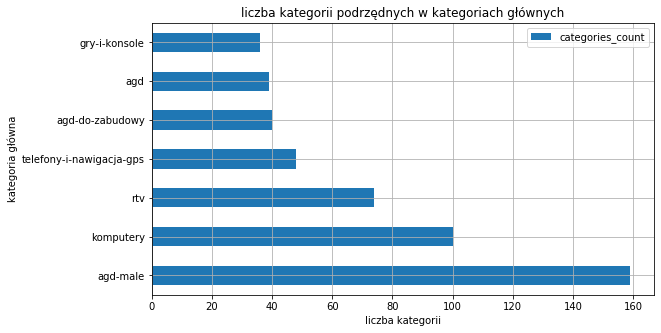

In [15]:
parent_categories_summary[['parent_category','categories_count']].set_index('parent_category').sort_values(by='categories_count', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba kategorii podrzędnych w kategoriach głównych')
plt.xlabel('liczba kategorii')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba kategorii podrzędnych w kategoriach głównych.png')
plt.show()

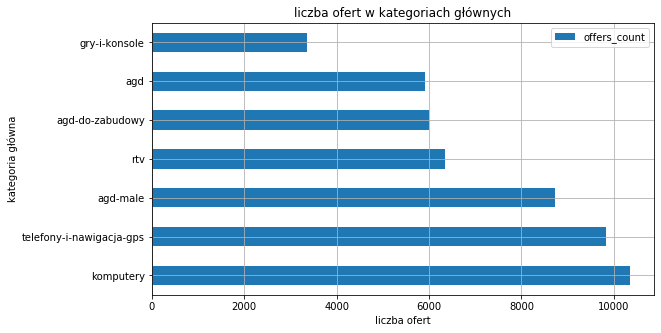

In [16]:
parent_categories_summary[['parent_category','offers_count']].set_index('parent_category').sort_values(by='offers_count', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba ofert w kategoriach głównych')
plt.xlabel('liczba ofert')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba ofert w kategoriach głównych.png')
plt.show()

### 4.2 Analiza ilości ofert w kategoriach podrzędnych

#### 4.2.1 Wybrane statystyki

In [17]:
df.offers_count.describe()

count     489.000000
mean      103.310838
std       217.343776
min         1.000000
25%        12.000000
50%        33.000000
75%        94.000000
max      2631.000000
Name: offers_count, dtype: float64

In [18]:
df.offers_count.agg(['min', 'median', 'max', 'mean'])

min          1.000000
median      33.000000
max       2631.000000
mean       103.310838
Name: offers_count, dtype: float64

#### 4.2.2 Analiza wartości odstających

In [19]:
df.offers_count.quantile([.01,.25,.50,.75,.99])

0.01      1.00
0.25     12.00
0.50     33.00
0.75     94.00
0.99    848.12
Name: offers_count, dtype: float64

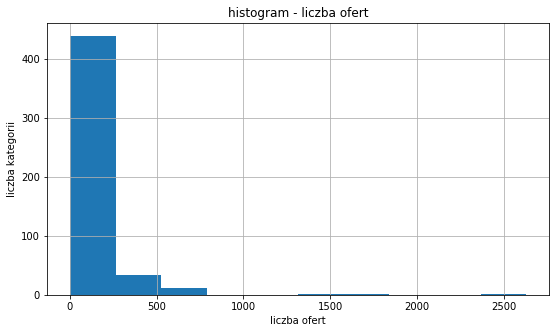

In [20]:
df.offers_count.plot.hist(figsize=(9,5))
plt.title("histogram - liczba ofert")
plt.xlabel('liczba ofert')
plt.ylabel('liczba kategorii')
plt.grid()
plt.savefig('./charts/histogram - liczba ofert.png')
plt.show()

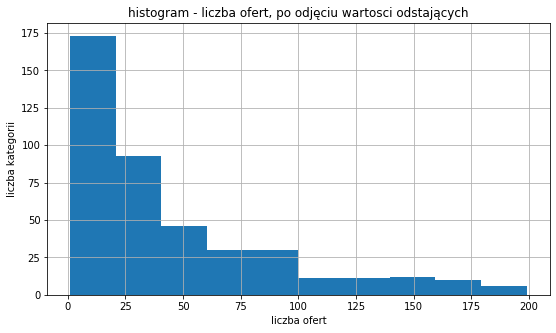

In [21]:
q1, q3 = df.offers_count.quantile([.25,.75])
iqr = q3 - q1
down_boundary = q1-iqr*1.5
upper_boundary = q3+iqr*1.5

df[(df.offers_count < upper_boundary) & (df.offers_count > down_boundary)].offers_count.plot.hist(figsize=(9,5))
plt.title("histogram - liczba ofert, po odjęciu wartosci odstających")
plt.xlabel('liczba ofert')
plt.ylabel('liczba kategorii')
plt.grid()
plt.savefig('./charts/histogram - liczba ofert, po odjęciu wartosci odstających.png')
plt.show()

#### 4.2.3 Top 3 najwiekszych kategorii podrzędnych po kategoriach głównych:

In [22]:
categories_summary = df.set_index('category').groupby('parent_category').offers_count.nlargest(3)
categories_summary

parent_category           category                   
agd                       zlewozmywaki                   1676.0
                          okapy                           700.0
                          baterie-kuchenne                654.0
agd-do-zabudowy           zlewozmywaki                   1676.0
                          okapy                           700.0
                          baterie-kuchenne                654.0
agd-male                  kawy                            391.0
                          czajniki                        382.0
                          patelnie                        321.0
gry-i-konsole             myszy                           638.0
                          sluchawki-dla-graczy-pc         448.0
                          klawiatury                      281.0
komputery                 laptopy-i-netbooki              779.0
                          monitory-led-i-lcd              722.0
                          myszy                   